In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from sklearn.model_selection import train_test_split

from sklearn import metrics
import math, time, random, datetime
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV, learning_curve, cross_val_score

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE



import warnings
warnings.filterwarnings('ignore')

In [2]:
hr_employee_data = pd.read_csv("HR-Employee-Attrition.csv")

In [3]:
hr_employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr_employee_data.shape

(1470, 35)

In [5]:
hr_employee_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
hr_employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
hr_employee_data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [8]:
hr_employee_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

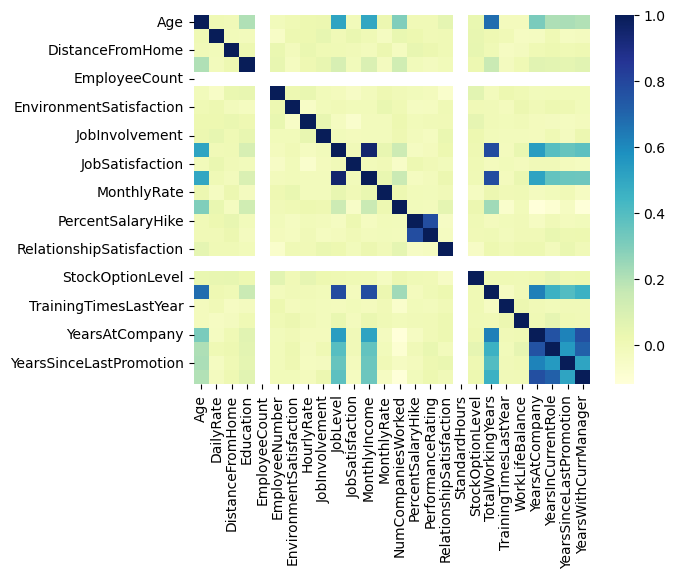

In [9]:
sns.heatmap(hr_employee_data.corr(), annot = False, cmap = "YlGnBu")

In [10]:
# drop the unnecessary columns
hr_employee_data.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [11]:
hr_employee_data['Attrition'] = hr_employee_data['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )
hr_employee_data['OverTime'] = hr_employee_data['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

In [12]:
# 'EnviornmentSatisfaction', 'JobInvolvement', 'JobSatisfacction', 'RelationshipSatisfaction', 'WorklifeBalance' can be clubbed into a single feature 'TotalSatisfaction'

hr_employee_data['Total_Satisfaction'] = (hr_employee_data['EnvironmentSatisfaction'] + 
                            hr_employee_data['JobInvolvement'] + 
                            hr_employee_data['JobSatisfaction'] + 
                            hr_employee_data['RelationshipSatisfaction'] +
                            hr_employee_data['WorkLifeBalance']) /5 

# Drop Columns
hr_employee_data.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'], axis=1, inplace=True)

In [13]:
hr_employee_data.Total_Satisfaction.describe()

count    1470.000000
mean        2.730748
std         0.428551
min         1.200000
25%         2.400000
50%         2.800000
75%         3.000000
max         4.000000
Name: Total_Satisfaction, dtype: float64

In [14]:
hr_employee_data.shape

(1470, 27)

#### Create dummy variables for categorical columns

In [15]:
categorical_columns = hr_employee_data.select_dtypes(include = ['object']).columns.to_list()

In [16]:

for var in categorical_columns:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr_employee_data[var], prefix=var)
    data1=hr_employee_data.join(cat_list)
    hr_employee_data=data1
#cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=hr_employee_data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in categorical_columns]

In [17]:
hr_employee_data=hr_employee_data[to_keep]
hr_employee_data.columns.values

array(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Total_Satisfaction', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
     

In [18]:
hr_employee_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,94,2,5993,19479,8,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,61,2,5130,24907,1,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,92,1,2090,2396,6,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,56,1,2909,23159,1,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,40,1,3468,16632,9,...,1,0,0,0,0,0,0,0,1,0


In [19]:
hr_employee_data.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'HourlyRate', 'JobLevel', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Total_Satisfaction',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobR

In [20]:
hr_employee_data['MaritalStatus_Divorced'].unique()

array([0, 1], dtype=uint8)

In [21]:
hr_employee_data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [22]:
hr_employee_data.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,65.952149,2.145985,6832.739659,14265.779400,2.645580,0.234388,...,0.159773,0.078670,0.109489,0.063260,0.198702,0.218167,0.040552,0.238443,0.477697,0.283861
1,33.607595,750.362869,10.632911,2.839662,65.573840,1.637131,4787.092827,14559.308017,2.940928,0.535865,...,0.261603,0.021097,0.042194,0.008439,0.198312,0.240506,0.139241,0.139241,0.354430,0.506329


#### Observations:
On an average, age of employees who have attrited is lower than those who have not.
Attrited employees show lower monthly income and have clocked in more overtime than not attrited

#### Since the data is imbalanced, using SMOTE for oversampling, i.e. to create synthetic data for minority class of attrited employees

In [23]:
X = hr_employee_data.loc[:, hr_employee_data.columns != 'Attrition']
y = hr_employee_data.loc[:, hr_employee_data.columns == 'Attrition']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Attrition'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of not attrited employees in oversampled data",len(os_data_y[os_data_y['Attrition']==0]))
print("Number of attrited employees",len(os_data_y[os_data_y['Attrition']==1]))
print("Proportion of not attrited employees in oversampled data is ",len(os_data_y[os_data_y['Attrition']==0])/len(os_data_X))
print("Proportion of attrited employees in oversampled data is ",len(os_data_y[os_data_y['Attrition']==1])/len(os_data_X))

length of oversampled data is  1724
Number of not attrited employees in oversampled data 862
Number of attrited employees 862
Proportion of not attrited employees in oversampled data is  0.5
Proportion of attrited employees in oversampled data is  0.5


#### With this, the data now is balanced. 
#### In order to avoid data leakage, synthetic sample should be created from taining data only

In [24]:
hr_employee_data.shape

(1470, 47)

#### Feature Selection - Using Recursive Feature Elimination

In [25]:
data_final_vars=hr_employee_data.columns.values.tolist()

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=35)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
print(rfe.feature_names_in_)

[False False False False False  True False False  True  True False False
  True False  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[ 9 10  7  2  8  1 11 12  1  1  6  5  1  4  1  3  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
['Age' 'DailyRate' 'DistanceFromHome' 'Education' 'HourlyRate' 'JobLevel'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'StockOptionLevel'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'Total_Satisfaction' 'BusinessTravel_Non-Travel'
 'BusinessTravel_Travel_Frequently' 'BusinessTravel_Travel_Rarely'
 'Department_Human Resources' 'Department_Research & Development'
 'Department_Sales' 'EducationField_Human Resources'
 'EducationF

In [26]:
selected_cols = rfe.get_feature_names_out()

In [27]:
X=os_data_X[selected_cols]
y=os_data_y['Attrition']

In [28]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.306753
         Iterations: 35
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.557      
Dependent Variable:        Attrition             AIC:                   1127.6846  
Date:                      2024-10-12 01:18      BIC:                   1318.5187  
No. Observations:          1724                  Log-Likelihood:        -528.84    
Df Model:                  34                    LL-Null:               -1195.0    
Df Residuals:              1689                  LLR p-value:           3.6694e-258
Converged:                 0.0000                Scale:                 1.0000     
No. Iterations:            35.0000                                                 
-----------------------------------------------------------------------------------
                                   Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------

#### Removing insignificant features having p-value <= 0.05

In [29]:
revised_selected_cols = ['JobLevel', 'NumCompaniesWorked', 'OverTime',
       'Total_Satisfaction', 'BusinessTravel_Non-Travel',
       'Department_Research & Development',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single']

In [30]:
X=os_data_X[revised_selected_cols]
y=os_data_y['Attrition']

In [31]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.327252
         Iterations 9
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.528      
Dependent Variable:        Attrition             AIC:                   1174.3643  
Date:                      2024-10-12 01:18      BIC:                   1299.7695  
No. Observations:          1724                  Log-Likelihood:        -564.18    
Df Model:                  22                    LL-Null:               -1195.0    
Df Residuals:              1701                  LLR p-value:           3.1016e-253
Converged:                 1.0000                Scale:                 1.0000     
No. Iterations:            9.0000                                                  
-----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
---------

#### Logistic Regression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [34]:
train_accuracy = accuracy_score(y_train, logreg.predict(X_train))
test_accuracy = accuracy_score(y_test, logreg.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9054726368159204
Test Accuracy: 0.8976833976833977


In [35]:
cross_val_scores = cross_val_score(logreg, X, y, cv =5)

print(f'Cross-validation Scores: {cross_val_scores}')
print(f'Mean CV Score: {cross_val_scores.mean()}')

Cross-validation Scores: [0.55942029 0.95362319 0.93913043 0.97681159 0.9505814 ]
Mean CV Score: 0.8759133805190429


#### Cross-validation Score is closer to training data score, the model is not overfitting

#### Here logistic regresssion is applied without any regularization. Since Test data accuracy is slightly lower than that of Training data, model is not overfitting. Same can be seen later below when ridge regularization is applied, the model performance doesn't improve.

In [36]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[236  21]
 [ 32 229]]


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       257
           1       0.92      0.88      0.90       261

    accuracy                           0.90       518
   macro avg       0.90      0.90      0.90       518
weighted avg       0.90      0.90      0.90       518



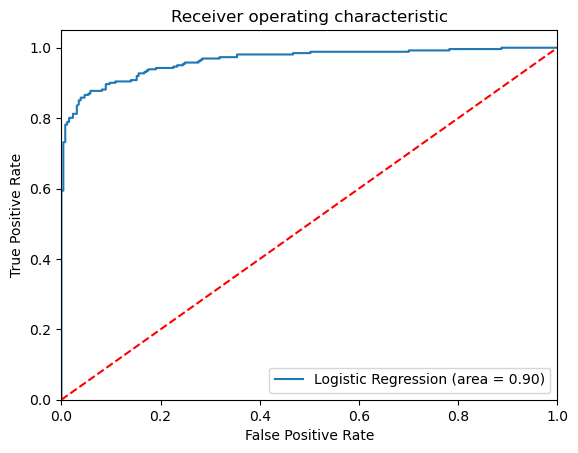

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Applying ridge regularization on Logistic Regression

Accuracy of logistic regression classifier on test set: 0.88
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       257
           1       0.87      0.89      0.88       261

    accuracy                           0.88       518
   macro avg       0.88      0.88      0.88       518
weighted avg       0.88      0.88      0.88       518



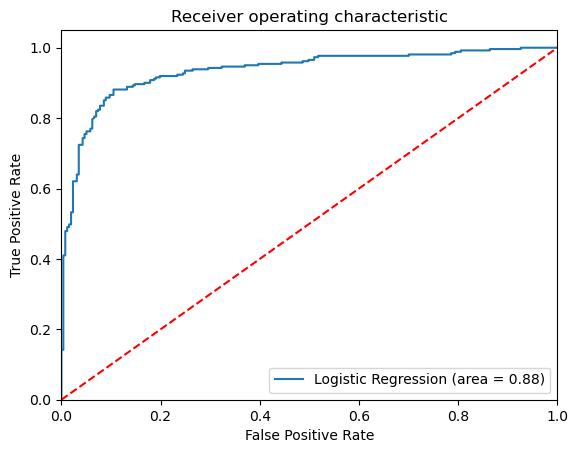

In [43]:
X_train_l2, X_test_l2, y_train_l2, y_test_l2 = train_test_split(X, y, test_size=0.3, random_state=0)
logreg_with_l2 = LogisticRegression(C=0.01, penalty='l2')
logreg_with_l2.fit(X_train_l2, y_train_l2)

y_pred_l2 = logreg_with_l2.predict(X_test_l2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_with_l2.score(X_test_l2, y_test_l2)))



print(classification_report(y_test_l2, y_pred_l2))



logit_roc_auc_l2 = roc_auc_score(y_test_l2, logreg_with_l2.predict(X_test_l2))
fpr, tpr, thresholds = roc_curve(y_test_l2, logreg_with_l2.predict_proba(X_test_l2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_l2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [44]:
train_accuracy_l2 = accuracy_score(y_train_l2, logreg_with_l2.predict(X_train_l2))
test_accuracy_l2 = accuracy_score(y_test_l2, logreg_with_l2.predict(X_test_l2))

print(f'Training Accuracy: {train_accuracy_l2}')
print(f'Test Accuracy: {test_accuracy_l2}')

Training Accuracy: 0.8490878938640133
Test Accuracy: 0.8783783783783784


#### The logistic regression model without regularization gives 90% accuracy. The ROC curve also shows the model is a good fit model, since the area under the curve is 0.90, which is very far towards left from the red line